In [1]:
import pandas as pd 


In [2]:
titanic=pd.read_csv("train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Cabin'].fillna("Not in cabin,somewhere else! also go and ask to ship's staff",inplace=True)

In [6]:
Embark_mode=titanic['Embarked'].mode()
titanic['Embarked'].fillna(Embark_mode[0],inplace=True)

In [7]:
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [8]:
titanic.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,"Not in cabin,somewhere else! also go and ask t...",C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,"Not in cabin,somewhere else! also go and ask t...",S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,"Not in cabin,somewhere else! also go and ask t...",C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,"Not in cabin,somewhere else! also go and ask t...",S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S


In [9]:
titanic["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
def get_initial(value):
    name = value.split(',')[1]
    initials = name.split('.')[0]
    return initials.strip()


In [11]:
titanic['initials']=titanic['Name'].apply(get_initial)

In [12]:
titanic['initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<Axes: xlabel='initials'>

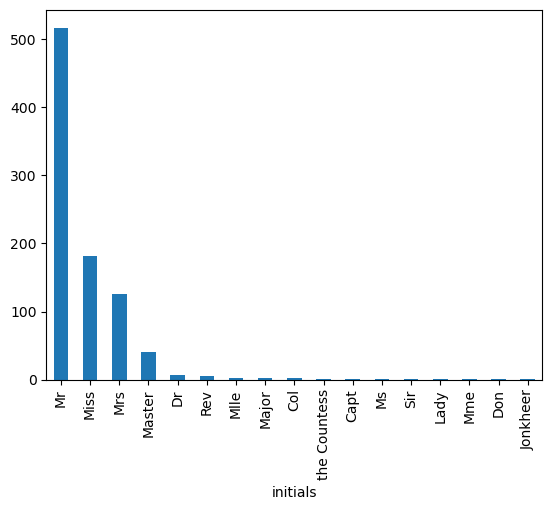

In [13]:
titanic['initials'].value_counts().plot.bar()

In [14]:
titanic.groupby(['initials', titanic['Age'].isna()]).size()


initials      Age  
Capt          False      1
Col           False      2
Don           False      1
Dr            False      6
              True       1
Jonkheer      False      1
Lady          False      1
Major         False      2
Master        False     36
              True       4
Miss          False    146
              True      36
Mlle          False      2
Mme           False      1
Mr            False    398
              True     119
Mrs           False    108
              True      17
Ms            False      1
Rev           False      6
Sir           False      1
the Countess  False      1
dtype: int64

In [15]:
titanic[titanic['Age'].isna()].groupby('initials').size()


initials
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
dtype: int64

In [16]:
titanic['initials'].value_counts()

initials
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [17]:
 titanic.groupby('initials')['Age'].agg(Nan_Counts=lambda x: x.isna().sum(), NotNan_Counts=lambda x: x.notna().sum())


,Nan_Counts,NotNan_Counts
initials,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,0,1
Major,0,2
Master,4,36
Miss,36,146


In [18]:
mean_age_by_initials = titanic.groupby('initials')['Age'].mean()
mean_age_by_initials


initials
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [19]:
titanic['Age'] = titanic['Age'].fillna(mean_age_by_initials)

In [20]:
titanic.sample(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initials
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,Miss
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,"Not in cabin,somewhere else! also go and ask t...",S,Master
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Mr
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,"Not in cabin,somewhere else! also go and ask t...",S,Miss
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,"Not in cabin,somewhere else! also go and ask t...",S,Mr
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,"Not in cabin,somewhere else! also go and ask t...",S,Mr
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,"Not in cabin,somewhere else! also go and ask t...",S,Mr
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,"Not in cabin,somewhere else! also go and ask t...",S,Mr
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,"Not in cabin,somewhere else! also go and ask t...",S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss


In [21]:
titanic[titanic['initials'] == 'Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initials
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,"Not in cabin,somewhere else! also go and ask t...",S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,"Not in cabin,somewhere else! also go and ask t...",S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,"Not in cabin,somewhere else! also go and ask t...",S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,"Not in cabin,somewhere else! also go and ask t...",C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


In [22]:
titanic.drop(columns=['initials'],inplace=True)

In [23]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Not in cabin,somewhere else! also go and ask t...",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Not in cabin,somewhere else! also go and ask t...",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Not in cabin,somewhere else! also go and ask t...",S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,"Not in cabin,somewhere else! also go and ask t...",S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,"Not in cabin,somewhere else! also go and ask t...",S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
